In [199]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Data Import

In [200]:
path = 'dataset/'

low = pd.read_csv(path+'low_v_tan_position.csv')
high = pd.read_csv(path+'high_v_tan_position.csv')

In [201]:
low.head()

,Unnamed: 0,SOURCE_ID,mag_abs,v_tan,l,b,g_rp
0,0,3293764686491591168,9.915977,42.387168,186.179032,-24.301958,1.112200
1,2,3293772490447823232,12.095703,31.409473,186.028342,-24.547609,1.320612
2,3,3293772589231403392,10.454383,7.266938,186.012913,-24.543605,1.190216
3,4,3293773246362078464,8.498131,13.477387,185.918718,-24.663517,1.005732
4,5,3293773830477619840,8.919980,27.725001,185.912979,-24.581077,1.121164


In [202]:
high.head()

,Unnamed: 0,SOURCE_ID,mag_abs,v_tan,l,b,g_rp
0,36,3293818223259506304,9.378773,105.648118,185.929313,-23.796143,1.109787
1,37,3293819215396280192,9.687300,119.167758,185.887620,-23.815332,1.150410
2,43,3293825129566916992,8.788501,156.051084,187.640929,-23.297590,1.083450
3,89,3293864157934057728,8.475696,130.803219,187.697237,-22.638987,1.028452
4,120,3293880066492881024,9.660731,128.149051,187.301746,-22.803261,1.091900


## Distribution

Text(0.5, 1.0, 'M-dwarfs Disk Galactic Latitude Distribution')

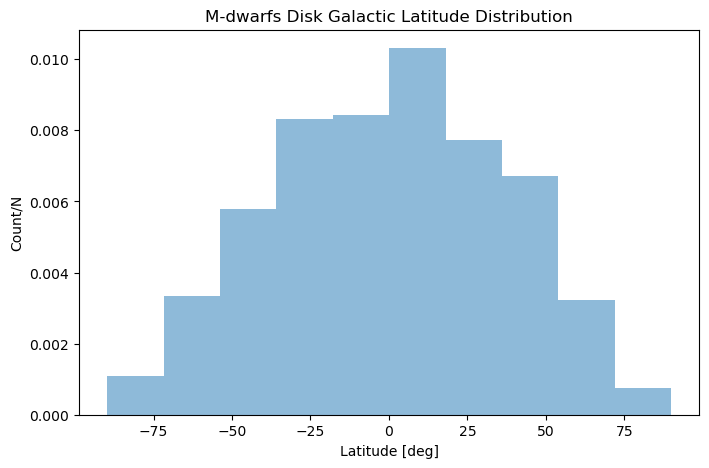

In [203]:
fig, ax = plt.subplots(figsize=(8, 5))

plt.hist(low['b'], alpha=0.5, density=True)


plt.xlabel('Latitude [deg]')
plt.ylabel('Count/N')
plt.title('M-dwarfs Disk Galactic Latitude Distribution')

## Prior

Text(0.5, 1.0, 'M-dwarfs Disk Galactic Latitude Distribution')

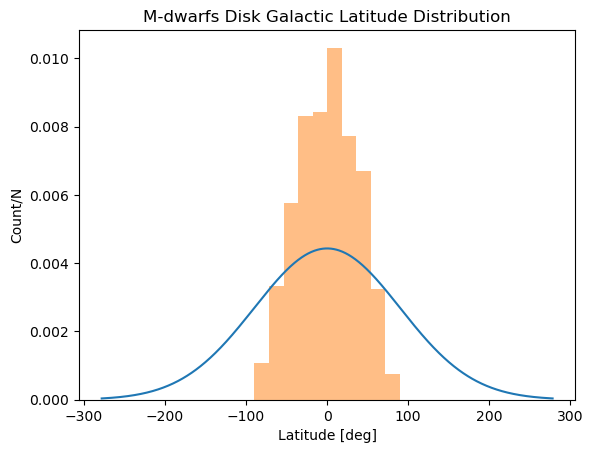

In [211]:
a= 0
b=90**2

plot_dist(a, np.sqrt(b))
plt.hist(low['b'], alpha=0.5, density=True)
plt.xlabel('Latitude [deg]')
plt.ylabel('Count/N')
plt.title('M-dwarfs Disk Galactic Latitude Distribution')

In [214]:
nobs = len(low['b'])
samp_mean = np.mean(low['b'])
samp_var = np.var(low['b'])
v = samp_var


print('Number of observations:',nobs)
print('Sample mean:',samp_mean)
print('Sample variance:',samp_var)

Number of observations: 182409
Sample mean: 0.07394853063060021
Sample variance: 1336.549888767328


In [215]:
post_var = (v*b / (nobs*b + v))

post_mean = (nobs * samp_mean / v) + a/b
post_mean = post_mean * post_var

print('Posterior Mean:',post_mean)
print('Posterior Variance:',post_var)
print('Posterior Sig:', np.sqrt(post_var))

Posterior Mean: 0.07394846373723435
Posterior Variance: 0.007327207976212154
Posterior Sig: 0.0855991120059791


In [216]:
ci_low_val = norm.ppf(0.05,loc=post_mean,scale=np.sqrt(post_var))
ci_up_val = norm.ppf(0.95,loc=post_mean,scale=np.sqrt(post_var))
print('95 % interval: ', ci_up_val-ci_low_val)

95 % interval:  0.28159601969372006


Text(0.5, 1.0, 'M-dwarfs Disk Galactic Latitude Distribution')

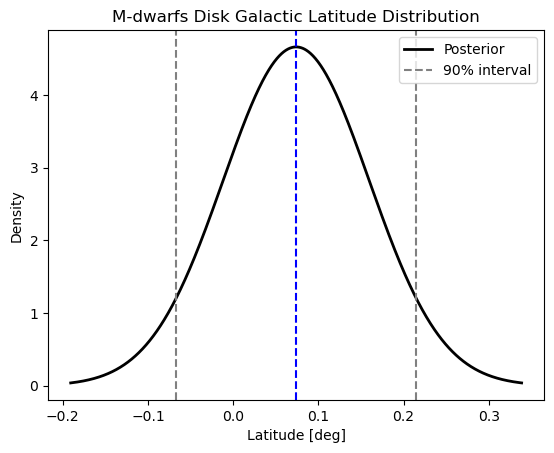

In [218]:
#plt.hist(low['b'], bins=10)

#plt.hist(low['b'], alpha=0.5, density=True)
plot_dist(post_mean, np.sqrt(post_var), 1000, 1, color='k', lw=2, label='Posterior')
plt.axvline(post_mean, color = "b", ls = "--")

plt.axvline(ci_low_val, color = "gray", ls = "--", label = '90% interval')
plt.axvline(ci_up_val, color = "gray", ls = "--")


plt.legend()
plt.xlabel('Latitude [deg]')
plt.ylabel('Density')
plt.title('M-dwarfs Disk Galactic Latitude Distribution')